# Lógica Fuzzy - Estudo de Caso das Gorjetas

Para relembrarmos das regras:

**Antecedentes (entradas)**:

Serviço: Que nota você daria para o serviço, em uma escala de 0 a 10?
 - ruim, aceitável, ótiomo

Qualidade da comida: Quão saborosa estava a comida, em uma escala de 0 a 10?
 - ruim, boa, saborosa


**Consequentes (saídas):**

Gorjeta: Quanto de gorjeta você daria, entre 0% e 20%?
 - baixa, média, alta


**Regras**:
 - Se a qualidade da comida for **ruim** OU o serviço for **ruim**, então a gorjeta deve ser **baixa**
 - Se o serviço for **médio** a gorjeta deve ser **média**
 - Se o serviço for **bom** e a qualidade da comida for **saborosa**, então a gorjeta deve ser **alta**


## Instalação e importação das bibliotecas necesárias

In [94]:
# instalar a biblioteca de lógica fuzzy que utilizaremos
!pip install scikit-fuzzy

In [95]:
# bibliotecas necessárias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequentes

In [96]:
# apenas para entendimento da função:
np.arange(0, 11, 1) #gera um vetor de 0 até 10, com diferença de "1" entre cada elemento

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [97]:
# Antecedentes:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [98]:
servico

Antecedent: servico

In [99]:
servico.universe # mostra o universo (range) de qualidades

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [100]:
# Consequente:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [101]:
#universo da gorjeta:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Função de Membership 

In [102]:
# popula automaticamente o universo (0 a 10) com esses valores, dentro dessas categorias
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

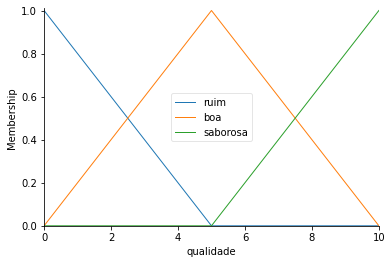

In [103]:
qualidade.view()

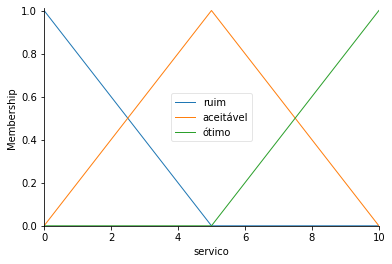

In [104]:
servico.view()

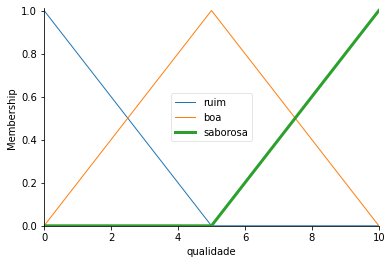

In [105]:
qualidade['saborosa'].view()

In [106]:
#trimf = função triângular
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8]) #inicio, pico, fim
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12, 20, 20])

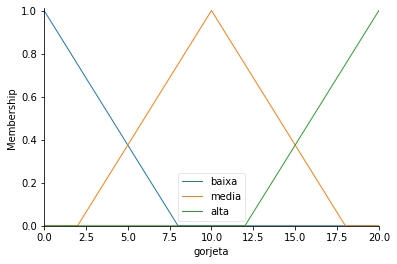

In [107]:
gorjeta.view()

In [108]:
# criação das regras
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [109]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [110]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [111]:
sistema.input['qualidade'] = 6
sistema.input['servico'] = 8

In [112]:
sistema.compute()

In [115]:
print('Gorjeta sugerida: ' , sistema.output['gorjeta'])

Gorjeta sugerida:  12.446091094493543


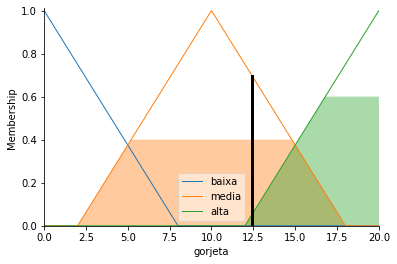

In [114]:
gorjeta.view(sim = sistema)

## Trabalhando com outros tipos de curvas

Conforme comentado, é possível configurar outros tipos de funções de membership. O objetivo agora é testar outras funções e comparar os resultados com o código que implementamos acima. 

Vamos executar as modifições descritas abaixo, e usaremos outros valores de parâmetros para realização dos testes


```
gorjeta['baixa'] = fizz.sigmn(gorjeta.universe, 5, -1)
gorjeta['media'] = fizz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fizz.pimf(gorjeta.universe, 10, 20, 20, 21)
```


In [116]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [119]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

## Membership...

In [122]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

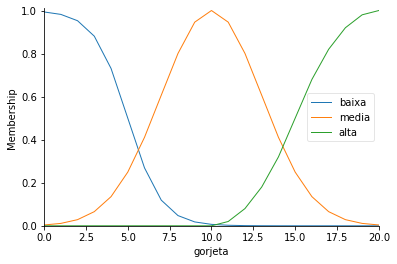

In [130]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)
gorjeta.view()

In [131]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle (com curvas)

In [132]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
sistema = ctrl.ControlSystemSimulation(sistema_controle)


In [133]:
sistema.input['qualidade'] = 1
sistema.input['servico'] = 1
sistema.compute()

5.662380878042331


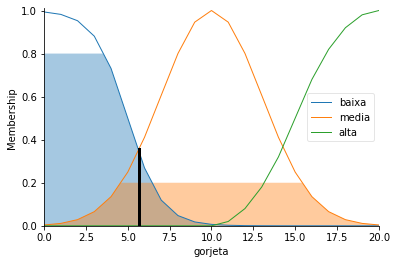

In [134]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)